# ML Textual model Feature Engineering

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import LabelEncoder

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

### Reading CSV file using pandas dataframe

In [3]:
dataset = pd.read_csv("patient_data_all_150.csv")
# dataset = pd.read_csv("patient data all 119.csv")
df_clean = dataset.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])
# df_clean = df_clean.head(1)
df_clean = df_clean.head(151)
df_clean
# dataset

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,NaN,NaN,"Fever, chills, or sweating,"
1,negative,31,male,NaN,NaN,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,NaN,NaN,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",NaN,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,NaN,"New or worsening cough,"
...,...,...,...,...,...,...
146,negative,34,male,"None,",NaN,"New or worsening cough, Sore throat,"
147,negative,38,male,"None,",NaN,"New or worsening cough, Sore throat,"
148,negative,21,male,"None,",NaN,"Sore throat,"
149,negative,23,male,"None,",NaN,"Body aches,"


### Counting number of nan values in each feature

In [5]:
ff = df_clean["medical_history"].isna().sum()
print(ff)

# Filling nan values with None.
df_clean["medical_history"].fillna("None,", inplace = True) 
df_clean["smoker"].fillna("no", inplace = True) 
df_clean["patient_reported_symptoms"].fillna("None,", inplace = True) 

3


In [6]:
df_clean.head()
# df_clean

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,"None,",no,"Fever, chills, or sweating,"
1,negative,31,male,"None,",no,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,"None,",no,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",no,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,no,"New or worsening cough,"


In [7]:
# In order to see how many unique values are there in my column
df_clean["medical_history"].describe()

count       151
unique        9
top       None,
freq        114
Name: medical_history, dtype: object

### Histogram

<Figure size 432x288 with 0 Axes>

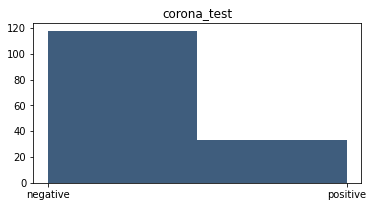

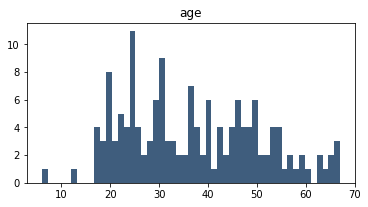

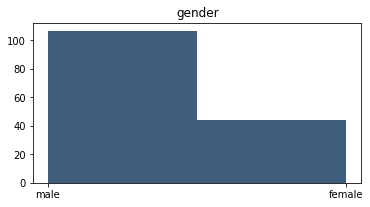

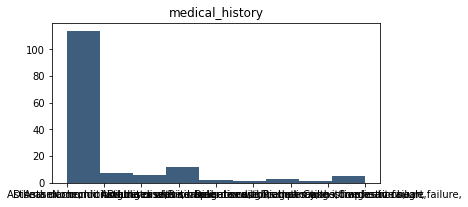

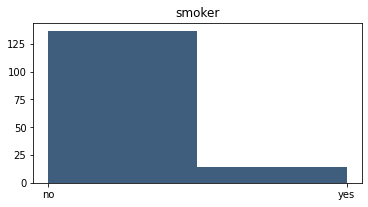

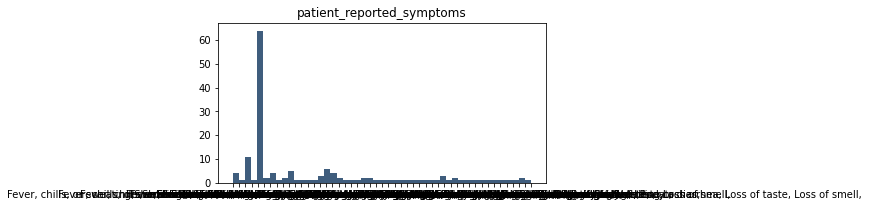

In [8]:
plt.suptitle("Histogram of Numerical Columns", fontsize = 20)
for i in range(1, df_clean.shape[1]+ 1): 
    plt.figure(figsize=(20,10))
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_clean.columns.values[i - 1])
    vals = np.size(df_clean.iloc[:, i - 1].unique())
    plt.hist(df_clean.iloc[:, i - 1], bins = vals, color = "#3F5D7D")

# Correlation

In [9]:
# TODO: Not working properly

# df_clean.corrwith(df_clean.corona_test).plot.bar(figsize = (20, 10),
#                                                 title= "Correlation With Responsive Variable", 
#                                                 fontsize = 15, rot = 45,
#                                                 grid = True)
# corr = df_clean.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [10]:
# For checking the data type of all the features
df_clean.dtypes

corona_test                  object
age                           int64
gender                       object
medical_history              object
smoker                       object
patient_reported_symptoms    object
dtype: object

In [11]:
# For checking how many unique rows in medical history.
df_clean["medical_history"].unique()

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,',
       'Asthma or chronic lung disease,Disease or conditions that make it harder to cough,',
       'Asthma or chronic lung disease,Diabetes with complications,',
       'Pregnancy,',
       'Diabetes with complications,Congestive heart failure,',
       'Congestive heart failure,'], dtype=object)

### reading csv containing important medical history diseases

In [12]:
top_medical_history = pd.read_csv("medical_history.csv").medical_history.values
top_medical_history

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,', 'Pregnancy,',
       'Congestive heart failure,', 'Extreme obesity,'], dtype=object)

### doing feature engineering on medical history

In [63]:
df2 = df_clean.copy()
for mh in top_medical_history:
    df2[mh] = df2.medical_history.str.contains(mh).astype(int)
    df2["medical_history"] = df2.medical_history.str.replace(mh+ ",", "")

df2["total_diseases"] = df2.medical_history.str.count(",")
df2 = df2.drop(columns = ["medical_history", "patient_reported_symptoms"])
df2

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,",total_diseases
0,negative,32,male,no,1,0,0,0,0,0,0,1
1,negative,31,male,no,1,0,0,0,0,0,0,1
2,negative,21,female,no,1,0,0,0,0,0,0,1
3,negative,33,male,no,0,1,0,0,0,0,0,1
4,negative,27,male,no,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146,negative,34,male,no,1,0,0,0,0,0,0,1
147,negative,38,male,no,1,0,0,0,0,0,0,1
148,negative,21,male,no,1,0,0,0,0,0,0,1
149,negative,23,male,no,1,0,0,0,0,0,0,1


# Doing feature engineering on reported Symptoms

In [64]:
# For checking how many unique rows in patient_reported_symptoms.
# df_clean["patient_reported_symptoms"].unique()
# df_clean["patient_reported_symptoms"].head(8)

In [65]:
# reading csv_file of patient recorded symptoms
top_symptoms = pd.read_csv("patient_reported_symptoms.csv").patient_reported_symptoms.values
top_symptoms

array(['Fever,', 'chills,', 'or sweating,', 'Shortness of breath',
       'Loss of taste,', 'Loss of smell,', 'New or worsening cough,',
       'Sore throat,', 'Body aches,', 'None,'], dtype=object)

#### Breaking every symptom into a feature

In [66]:
df3 = df_clean.copy()
for ps in top_symptoms:
    df3[ps] = df_clean.patient_reported_symptoms.str.contains(ps).astype(int)
    df3["patient_reported_symptoms"] = df_clean.patient_reported_symptoms.str.replace(ps+ ",", "")

df3["total symptoms"] = df_clean.patient_reported_symptoms.str.count(",")
df3 = df3.drop(columns = ["patient_reported_symptoms", "medical_history", "corona_test", "age", "gender", "smoker"])

df3.rename(columns={'None,':'Nothing'}, 
                 inplace=True)
df3

,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing,total symptoms
0,1,1,1,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,1,1,1,0,0,0,7
4,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,0,0,0,1,0,0,0,1
147,0,0,0,0,0,0,1,0,0,0,1
148,0,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,0


##### Here we are merging the dataframes based on these features

In [67]:
df4 = pd.concat([df2, df3], axis=1, ignore_index=False)
# here you can drop total symptoms and total diseases column as well, in order to make your algo more robust
df4 = df4.drop(columns = ["total_diseases", "total symptoms"])
df4

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,negative,32,male,no,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,negative,31,male,no,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,negative,21,female,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,negative,33,male,no,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
4,negative,27,male,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,negative,34,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
147,negative,38,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
148,negative,21,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,negative,23,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# for visualizing statistical detail of dataframe.
df4.describe()

,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,","Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,36.947020,0.754967,0.066225,0.052980,0.092715,0.019868,0.039735,0.0,0.231788,0.231788,0.218543,0.264901,0.145695,0.066225,0.331126,0.245033,0.092715,0.423841
std,13.704397,0.431538,0.249503,0.224739,0.290998,0.140009,0.195986,0.0,0.423379,0.423379,0.414633,0.442749,0.353975,0.249503,0.472184,0.431538,0.290998,0.495810
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df4.dtypes

corona_test                                            object
age                                                     int64
gender                                                 object
smoker                                                 object
None,                                                   int32
Asthma or chronic lung disease,                         int32
Disease or conditions that make it harder to cough,     int32
Diabetes with complications,                            int32
Pregnancy,                                              int32
Congestive heart failure,                               int32
Extreme obesity,                                        int32
Fever,                                                  int32
chills,                                                 int32
or sweating,                                            int32
Shortness of breath                                     int32
Loss of taste,                                          int32
Loss of 

In [70]:
# for checking total no of nan values in dataset.
df4.isna().sum()

corona_test                                            0
age                                                    0
gender                                                 0
smoker                                                 0
None,                                                  0
Asthma or chronic lung disease,                        0
Disease or conditions that make it harder to cough,    0
Diabetes with complications,                           0
Pregnancy,                                             0
Congestive heart failure,                              0
Extreme obesity,                                       0
Fever,                                                 0
chills,                                                0
or sweating,                                           0
Shortness of breath                                    0
Loss of taste,                                         0
Loss of smell,                                         0
New or worsening cough,        

### For checking class distribution

negative    118
positive     33
Name: corona_test, dtype: int64


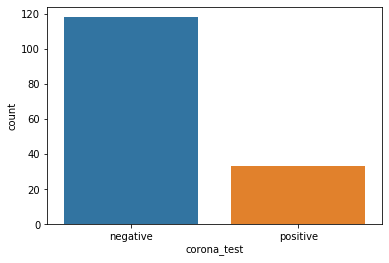

In [71]:
ax = sns.countplot(x = "corona_test", data = df4)
print(df4["corona_test"].value_counts())

pos = df4["corona_test"].value_counts()[0]
neg = df4["corona_test"].value_counts()[1]

### For checking contribution from each class in terms of percentage. 

In [72]:
neg_per = 100 *(pos / float(df4.shape[0]))
pos_per = 100 *(neg / float(df4.shape[0]))
print(neg_per)
print(pos_per)

78.1456953642384
21.85430463576159


In [73]:
# For checking distribution of values in each column or in each feature.. 

unique = df4["age"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 51
24    8
20    8
40    6
50    6
29    6
30    6
46    6
22    5
26    4
36    4
Name: age, dtype: int64


In [74]:
# For checking distribution of values in each column or in each feature..  (checking distribution of age)

unique = df4["gender"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 2
male      107
female     44
Name: gender, dtype: int64


In [75]:
# For checking distribution of values in each column or in each feature..  (checking distribution of )
unique = df4["smoker"].value_counts()
print("Number of unique smoker values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique smoker values : 2
no     137
yes     14
Name: smoker, dtype: int64


In [76]:
# In order to convert textural data into a numerical number for machine learning, we will use One hot encoding. 
# in pandas we have get_dummies function to convert textual data into seperate features like one hot encoder

In [77]:
df4['gender'] = LabelEncoder().fit_transform(df4['gender'])
df4['smoker'] = LabelEncoder().fit_transform(df4['smoker'])
# if df4['gender'][0] == 0:
#     print("Hi")
# df4['gender']
# df4["smoker"]
# df4.head()
# gender = pd.get_dummies(df4['gender'])
# smoker = pd.get_dummies(df4['smoker'], prefix='smoker')

In [78]:
# so here we are merging dataframes together
# df5 = pd.concat([gender, smoker, df4], axis=1, ignore_index=False)
# df5 = df5.drop(columns = ["gender", "smoker"])
df5 = df4.replace(to_replace ="negative", 
                 value =0)
df5 = df5.replace(to_replace ="positive", 
                 value =1)

corona_positive = len(df4[df4['corona_test'] == 'positive'])
corona_negative = len(df4[df4['corona_test'] == 'negative'])
count_pos = len(df5[df5["corona_test"] == 1])
count_neg = len(df5[df5["corona_test"] == 0])
print(count_pos)
print(count_neg)

print(corona_negative)
print(corona_positive)

target_labels = df5["corona_test"] 
df5 = df5.drop(columns = ["corona_test"])
df5
# target_labels

33
118
118
33


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,","Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,32,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
1,31,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0
2,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,33,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0
4,27,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,34,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
147,38,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
148,21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149,23,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
# Let's try SMOTE for balancing data 
# but we will just apply smote on training data
# blc testing data will remain original, no duplication in testing data. 
# so spliting the dataset

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

### Applying SMOTE

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# X_test.head()
X_train_smote.head()

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,","Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,0.313433,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.328358,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.582090,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.865672,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4,0.731343,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Now building the model

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Normalising train and test data
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# X_test_scaled = min_max_scaler.fit_transform(X_test)


model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

In [83]:
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6956521739130435
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.29      0.50      0.36         8

    accuracy                           0.70        46
   macro avg       0.58      0.62      0.58        46
weighted avg       0.77      0.70      0.72        46



col_0,0,1
row_0,,
0,28,10
1,4,4



ROC curve value is:  0.6019736842105263
Confusion matrix, without normalization
[[28 10]
 [ 4  4]]


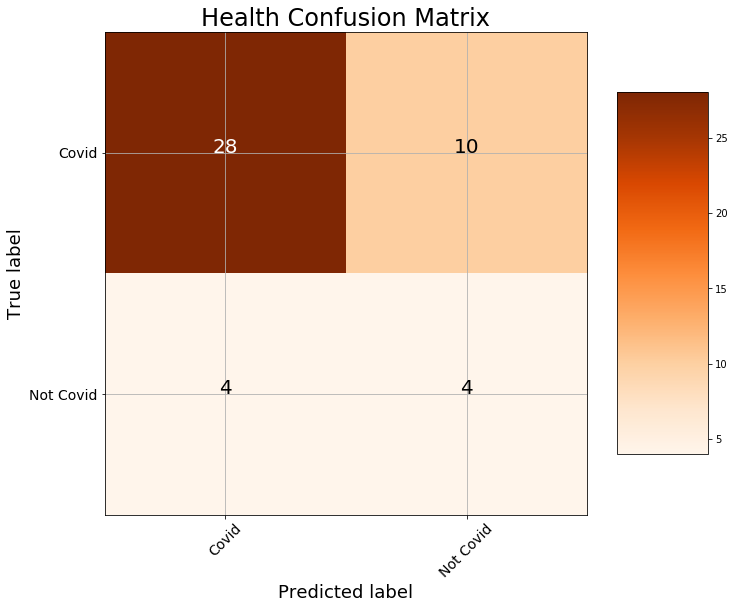

In [84]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat.png')

In [85]:
# calculate roc curve
ns_probs = [0 for _ in range(len(y_test))]

fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

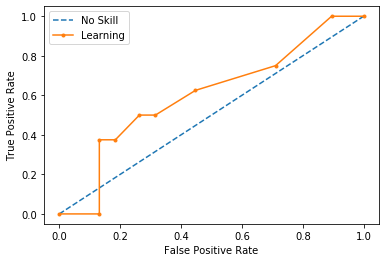

In [86]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Learning')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

### Now down here I m gonna use XGBoost
### along with RandomizedSearchCV for hyperparamter tuning

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=40, shuffle=True)

# doing oversampling on train data
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age

# X_test.head()
X_train_smote.head()
# Normalising train and test data

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 84, 1: 21})
After Smote:  Counter({0: 84, 1: 84})


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,","Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,1.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0
1,0.447761,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0
2,0.746269,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.895522,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0
4,0.701493,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0


In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.4, 0.6, 0.7] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 20, 25],
 "min_child_weight" : [ 1, 3, 5, 7, 8, 9, 10 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.6, 0.7, 0.9],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9 ]
    
}


classifier=xgboost.XGBClassifier(max_depth = 5, n_estimators = 200, subsample = 0.2, learning_rate = 0.02,
                                 min_child_weight = 1, random_state = 12) # random_state yha par change krny sy agr model ki
            # acc change ho rhi hai to yani model overfit kr rha hai. 

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=10,   
                                 scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [89]:
# random_search.best_estimator_

In [90]:
# random_search.best_params_

In [91]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, X_test, y_test ,cv=10)
print(score)
print(score.mean())

[0.6  0.6  0.8  0.8  0.8  0.8  0.75 0.75 0.75 0.75]
0.74


In [92]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

In [93]:
classifier.fit(X_train_smote, y_train_smote)

y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train_smote)

y_test = np.array(y_test).astype("int")
# y_test
print("Training accuracy is: ", accuracy_score(y_train_smote, y_train_pred))
print("Testing accuracy is: ", accuracy_score(y_test, y_test_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Training accuracy is:  0.7976190476190477
Testing accuracy is:  0.6304347826086957
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.14      0.17      0.15        12

    accuracy                           0.52        46
   macro avg       0.42      0.41      0.41        46
weighted avg       0.55      0.52      0.53        46

None


col_0,0,1
row_0,,
0,22,12
1,10,2



ROC curve value is:  0.7352941176470589
Confusion matrix, without normalization
[[22 12]
 [10  2]]


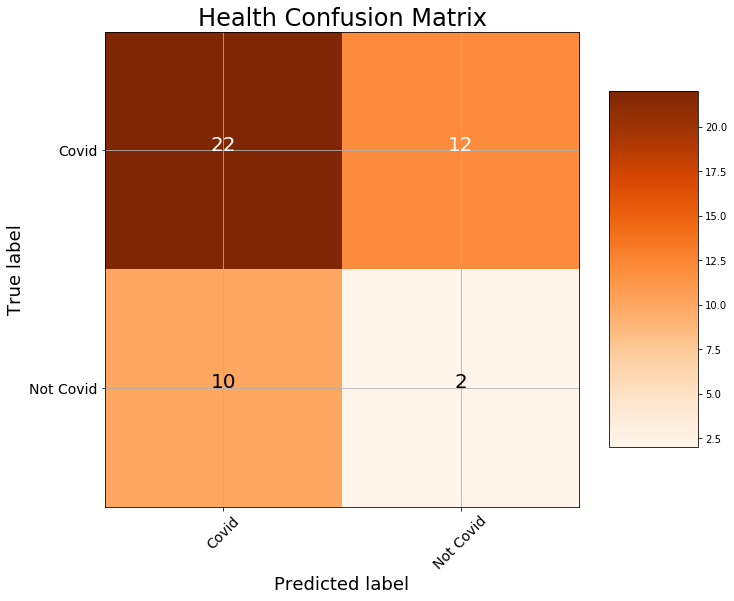

In [94]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat2.png')

##### NOTE: you can make prediction using randomized_search_hyperparameter_model as well. 

In [95]:
y_pred = random_search_model.predict(X_test)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6086956521739131
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        34
           1       0.25      0.25      0.25        12

    accuracy                           0.61        46
   macro avg       0.49      0.49      0.49        46
weighted avg       0.61      0.61      0.61        46

None


col_0,0,1
row_0,,
0,25,9
1,9,3


# Spliting data into training, validation and testing.
# and trying XGBoost 

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=50, shuffle=True)


# doing over sampling
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age


# # Normalising train, val and test data
# np.random.seed(1)
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# # X_val_scaled = min_max_scaler.fit_transform(X_val)
# X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.005, 0.001, 0.02, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 50, 65, 69, 79, 99, 101],
 "min_child_weight" : [ 1, 3, 5, 7, 15, 20, 26, 27],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 1, 5, 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,   
                                 scoring='roc_auc', n_jobs=-1, cv=5,verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


In [98]:
# This shows best paramter for your model
random_search_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.3, max_delta_step=0, max_depth=99,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
# This is almost the same but less concise.
random_search_model.best_params_

{'min_child_weight': 1,
 'max_depth': 99,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [100]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.02, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
classifier.fit(X_train_smote, y_train_smote)

y_pred = classifier.predict(X_test)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6521739130434783
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        38
           1       0.17      0.25      0.20         8

    accuracy                           0.65        46
   macro avg       0.50      0.49      0.49        46
weighted avg       0.71      0.65      0.68        46

None


col_0,0,1
row_0,,
0,28,10
1,6,2


# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
clf = GaussianNB()
clf.fit(X_train_smote,y_train_smote)
print("Accuracy on test dataset: ", clf.score(X_test,y_test))

Accuracy on test dataset:  0.2826086956521739


# SVM

In [104]:
from sklearn.svm import SVC

In [105]:
# with default hyper parameter
kernel = ["linear","poly","rbf","sigmoid"]
for i in kernel:
    clf = SVC(kernel = i)
    clf.fit(X_train_smote, y_train_smote)
    pred = clf.predict(X_test)
    print("Accuracy on test dataset with",i,"kernel: ", accuracy_score(pred,y_test)) 

Accuracy on test dataset with linear kernel:  0.5869565217391305
Accuracy on test dataset with poly kernel:  0.6521739130434783
Accuracy on test dataset with rbf kernel:  0.717391304347826
Accuracy on test dataset with sigmoid kernel:  0.5434782608695652


In [106]:
# hyper parameters for SVC
kernel = ["linear","poly","rbf","sigmoid"]
degree = [2,3,4]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
# making C list  
C=[1, 10, 100, 200, 300, 1000]


In [107]:
# trying to fit the model with different hyperparameters to achieve the highest accuracy
accuracy_history = []
for i in kernel:
    for j in degree:
        for k in gammas:
            for l in C:
                clf = SVC(kernel = i,C=l, degree = j, gamma=k,random_state=0)
                clf.fit(X_train_smote,y_train_smote)
                pred = clf.predict(X_test)
                accuracy = accuracy_score(pred,y_test)
                print("Accuracy on test dataset with",i,"kernel",j,"degree",k,"gamma",l,"C: ", accuracy)
                accuracy_history.append(accuracy)

Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 10 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 100 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 300 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1000 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 10 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 100 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 300 C:  0.543478260869565

Accuracy on test dataset with linear kernel 4 degree 1 gamma 1000 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 10 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 10 gamma 10 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 10 gamma 100 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 10 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 10 gamma 300 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 10 gamma 1000 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 100 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 100 gamma 10 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 100 gamma 100 C:  0.5434782608695652
Accuracy on test dataset with linear kernel 4 degree 100 gamma 200 C:  0.5434782608695652
Accuracy on test datas

Accuracy on test dataset with poly kernel 4 degree 1 gamma 100 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 1 gamma 200 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 1 gamma 300 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 1 gamma 1000 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 10 gamma 1 C:  0.6521739130434783
Accuracy on test dataset with poly kernel 4 degree 10 gamma 10 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 10 gamma 100 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 10 gamma 200 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 10 gamma 300 C:  0.717391304347826
Accuracy on test dataset with poly kernel 4 degree 10 gamma 1000 C:  0.717391304347826
Accuracy on test dataset with poly kernel 4 degree 100 gamma 1 C:  0.6956521739130435
Accuracy on test dataset with poly kernel 4 degree 

Accuracy on test dataset with rbf kernel 4 degree 10 gamma 300 C:  0.8043478260869565
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 1000 C:  0.782608695652174
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 1 C:  0.8260869565217391
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 10 C:  0.782608695652174
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 100 C:  0.8260869565217391
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 200 C:  0.8260869565217391
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 300 C:  0.8260869565217391
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 1000 C:  0.8478260869565217
Accuracy on test dataset with sigmoid kernel 2 degree 0.001 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with sigmoid kernel 2 degree 0.001 gamma 10 C:  0.6086956521739131
Accuracy on test dataset with sigmoid kernel 2 degree 0.001 gamma 100 C:  0.5652173913043478
Accuracy on test dataset with sig

Following hyperparameters are doing the best, concluded from above history

Accuracy on test dataset :  0.717391304347826

ROC curve value is:  0.6019736842105263
Confusion matrix, without normalization
[[28 10]
 [ 6  2]]


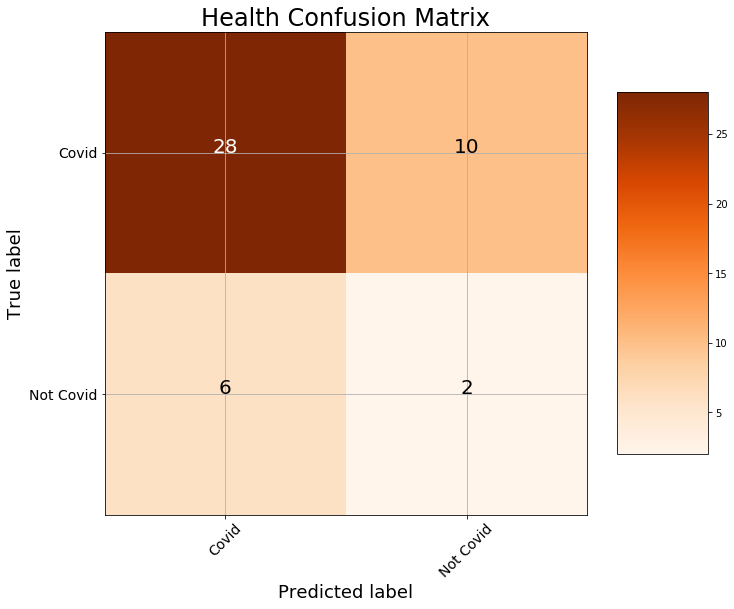

In [108]:
# X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

# # doing oversampling on train data
# X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
# print("Before Smote: ", Counter(y_train))
# print("After Smote: ", Counter(y_train_smote))


# # Normalising train and test data

# # min_max_scaler = preprocessing.MinMaxScaler()
# # X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# # X_test_scaled = min_max_scaler.fit_transform(X_test)
# X_train_scaled = X_train_smote
# X_test_scaled = X_test


clf = SVC(kernel = "poly", degree = 2, gamma = 10, C = 200,random_state=0, probability=True)
clf.fit(X_train_smote, y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)


# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat2.png')

import pickle

filename = 'test.sav'
pickle.dump(clf, open(filename, 'wb'))

In [109]:
clf = SVC(kernel = "poly", degree = 4, gamma = 1, C = 100,random_state =0, probability=True)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

# filename = 'test.sav'
# pickle.dump(clf, open(filename, 'wb'))

Accuracy on test dataset :  0.6956521739130435


In [110]:
clf = SVC(kernel = "poly", degree = 2, gamma = 1, C = 1,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.717391304347826


In [111]:
clf = SVC(kernel = "poly", degree = 2, gamma = 0.1, C = 200,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.717391304347826


# DecisionTreeClassifier

In [314]:
from sklearn import tree

In [315]:
clf = tree.DecisionTreeClassifier(min_samples_split = 5,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.8260869565217391


In [268]:
# Build Models 

# Random Forest
# TODO

In [343]:
# TODO
import pickle

filename = "test.sav"
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

pred = loaded_model.predict(X_test)

print(pred)
print(result)


[0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0]
0.782608695652174


In [345]:
# j = np.array(X_test)
j = X_test.head(1)
# j.shape
# hh = j[np.newaxis, ...]


# print(hh.shape)

probs = loaded_model.predict_proba(j)
probs

array([[0.56805259, 0.43194741]])

In [346]:
X_test.shape

(46, 20)

In [347]:
ii = np.argmax(probs)

if ii == 0:
    print("Corona pos")
else:
    print("corona neg")

Corona pos


# For saving the models u can either use pickel or u can use joblib

In [ ]:
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

In [6]:
import pandas as pd
ddd = pd.read_csv('patient data all 119.csv')
fff = ddd.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])

fff["medical_history"].fillna("None,", inplace = True) 
fff["smoker"].fillna("no", inplace = True) 
fff["patient_reported_symptoms"].fillna("None,", inplace = True) 
fff.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,"None,",no,"Fever, chills, or sweating,"
1,negative,31,male,"None,",no,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,"None,",no,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",no,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,no,"New or worsening cough,"


# Testing Text.py file

In [6]:
import text

# dd = text.train("patient data all 119.csv", "test.sav")
# print(dd)
dd = text.predict("test.csv", "model81.pkl")
dd

Number of unique age values : 1
32    1
Name: age, dtype: int64
Number of unique age values : 1
male    1
Name: gender, dtype: int64
Number of unique age values : 1
no    1
Name: smoker, dtype: int64
Df5:     age  gender  smoker  None,  Asthma or chronic lung disease,  \
0   32       0       0      1                                0   

   Disease or conditions that make it harder to cough,  \
0                                                  0     

   Diabetes with complications,  Pregnancy,  Congestive heart failure,  \
0                             0           0                          0   

   Extreme obesity,  Fever,  chills,  or sweating,  Shortness of breath,  \
0                 0       1        1             1                     0   

   Loss of taste,  Loss of smell,  New or worsening cough,  Sore throat,  \
0               0               0                        0             0   

   Body aches,  Nothing  
0            0        0  
data normalised:          age  gender

UnpicklingError: invalid load key, '\x00'.

# Training Textual model